In [1]:
import numpy as np
from itertools import product
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [2]:
# loading Database
with open('/content/sample_data/Different_PFMs_Sequence_based', 'r') as file:
    lines = file.readlines()

In [3]:
PFMs = []
i = 1

while i <= 46:
  selected_lines = lines[i:i+4]
  matrix = np.loadtxt(selected_lines)
  PFMs.append(matrix)
  i += 5

In [4]:
# making PPM from the PFM
PPMs = []
for pfm in PFMs:

  total_sequences = np.sum(pfm[:, 0])
  PPM = pfm / total_sequences
  PPMs.append(PPM)

In [5]:
def generate_sequences(ppm_matrix, sequence_length, num_sequences):
  num_positions = ppm_matrix.shape[1]
  sequences = []

  for _ in range(num_sequences):
      sequence = []
      for i in range(sequence_length):
          col_sum = np.sum(ppm_matrix[:, i])

          rand_val = np.random.uniform(0, col_sum)

          col_idx = 0
          cumulative_sum = ppm_matrix[col_idx, i]
          while cumulative_sum < rand_val:
              col_idx += 1
              cumulative_sum += ppm_matrix[col_idx, i]

          nucleotides = ['A', 'C', 'G', 'T']
          nucleotide = nucleotides[col_idx]
          sequence.append(nucleotide)

      sequences.append(sequence)

  return sequences

In [6]:
# generating a random sequence based on PPM
s = []
for ppm in PPMs:
  sequences = generate_sequences(ppm, 7, 30)
  s.append(sequences)

In [7]:
def create_PFM(sequences):
  num_columns = len(sequences[0])

  pfm = np.zeros((4, num_columns))

  for s in sequences:
    for i, nucleotide in enumerate(s):
      if nucleotide == 'A':
        pfm[0, i] += 1
      elif nucleotide == 'C':
        pfm[1, i] += 1
      elif nucleotide == 'G':
        pfm[2, i] += 1
      elif nucleotide == 'T':
        pfm[3, i] += 1
  return pfm

In [8]:
sample_PFMs = []
for sequences in s:
  sample_pfm = create_PFM(sequences)
  sample_PFMs.append(sample_pfm)

In [9]:
def all_possible_w_mer(length):

  combinations = product('ACGT', repeat=length)

  w_mers = [''.join(combination) for combination in combinations]

  return w_mers

In [10]:
list_w_mers = all_possible_w_mer(7)

In [11]:
nucleotides = ['A', 'C', 'G', 'T']

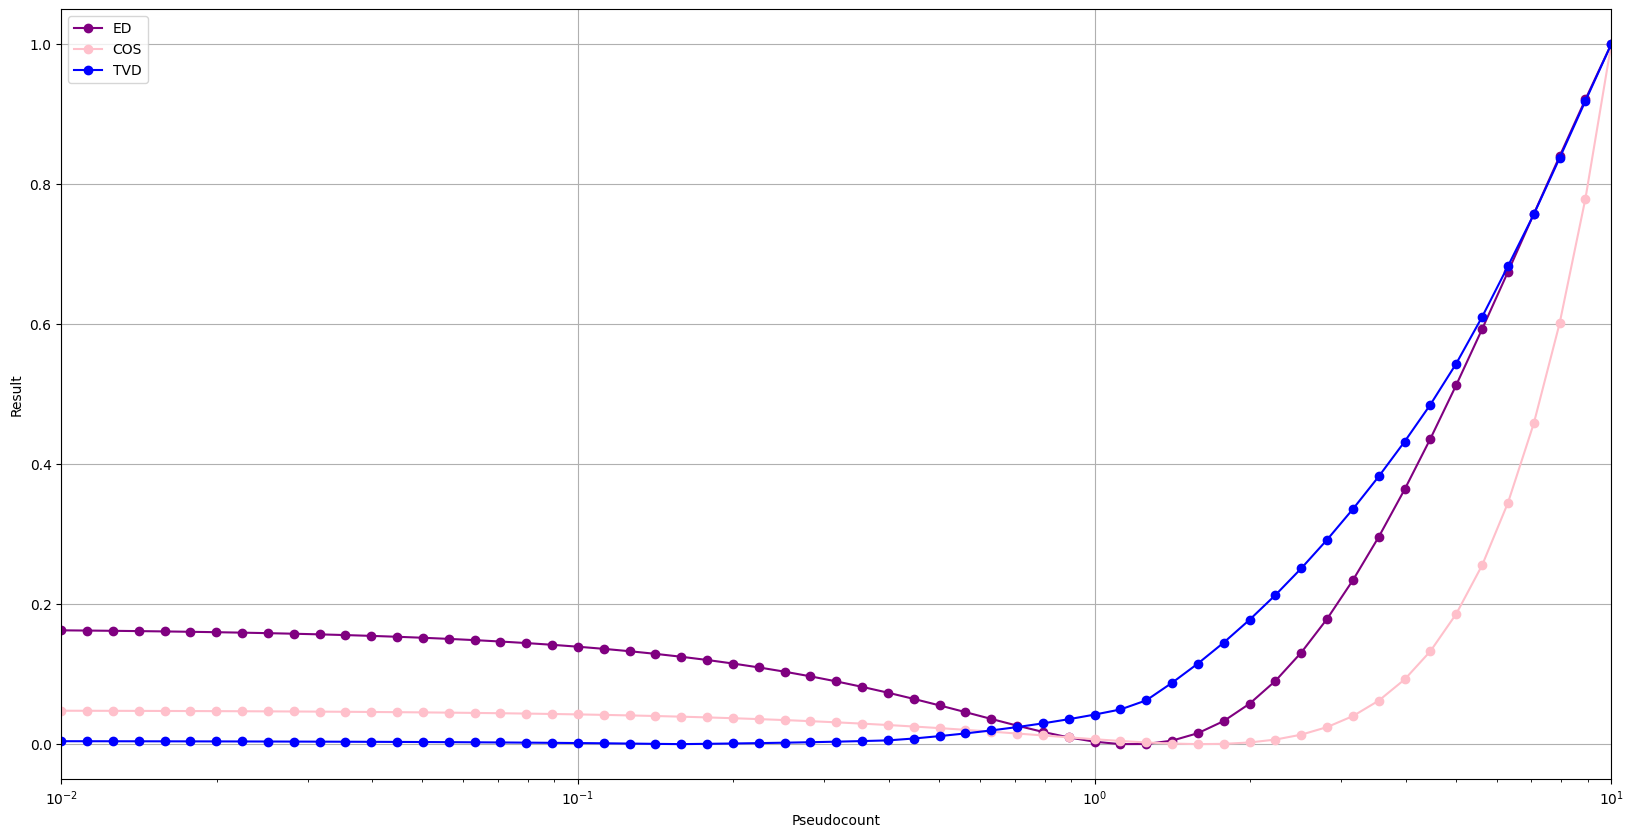

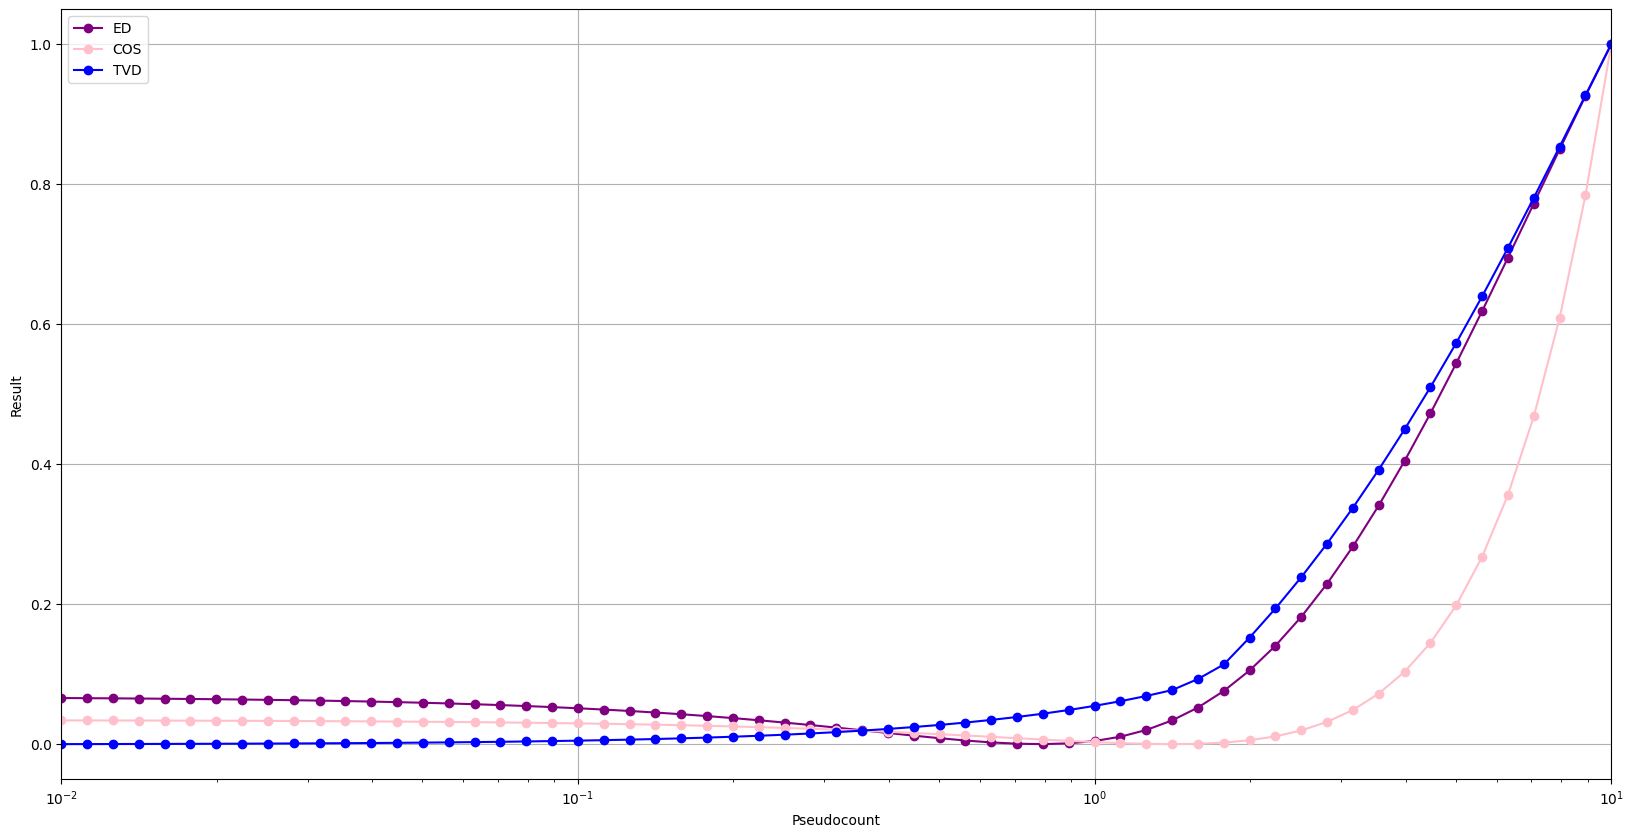

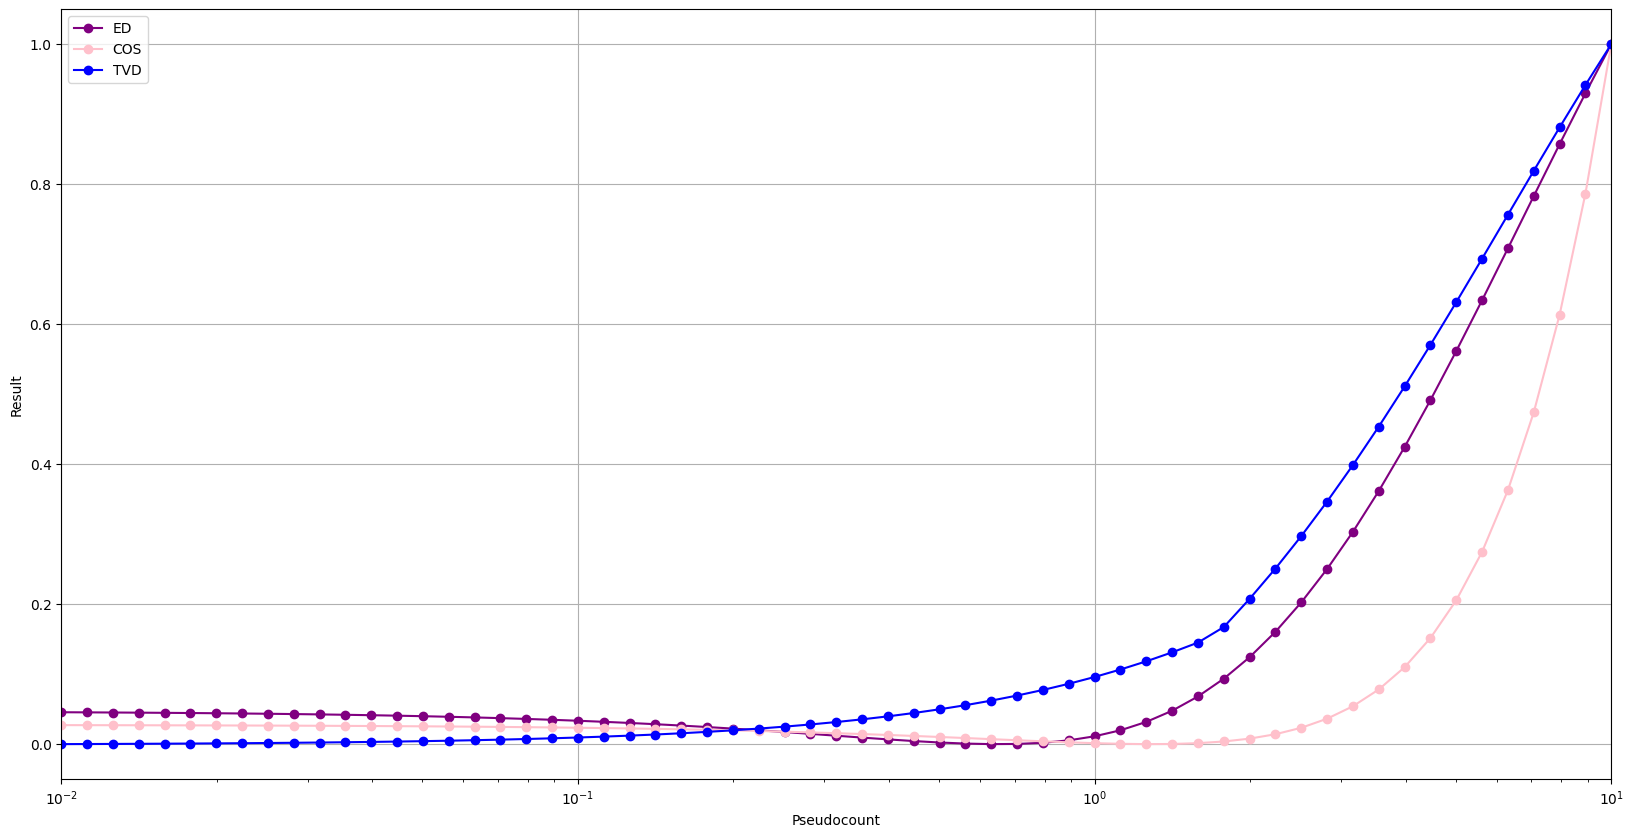

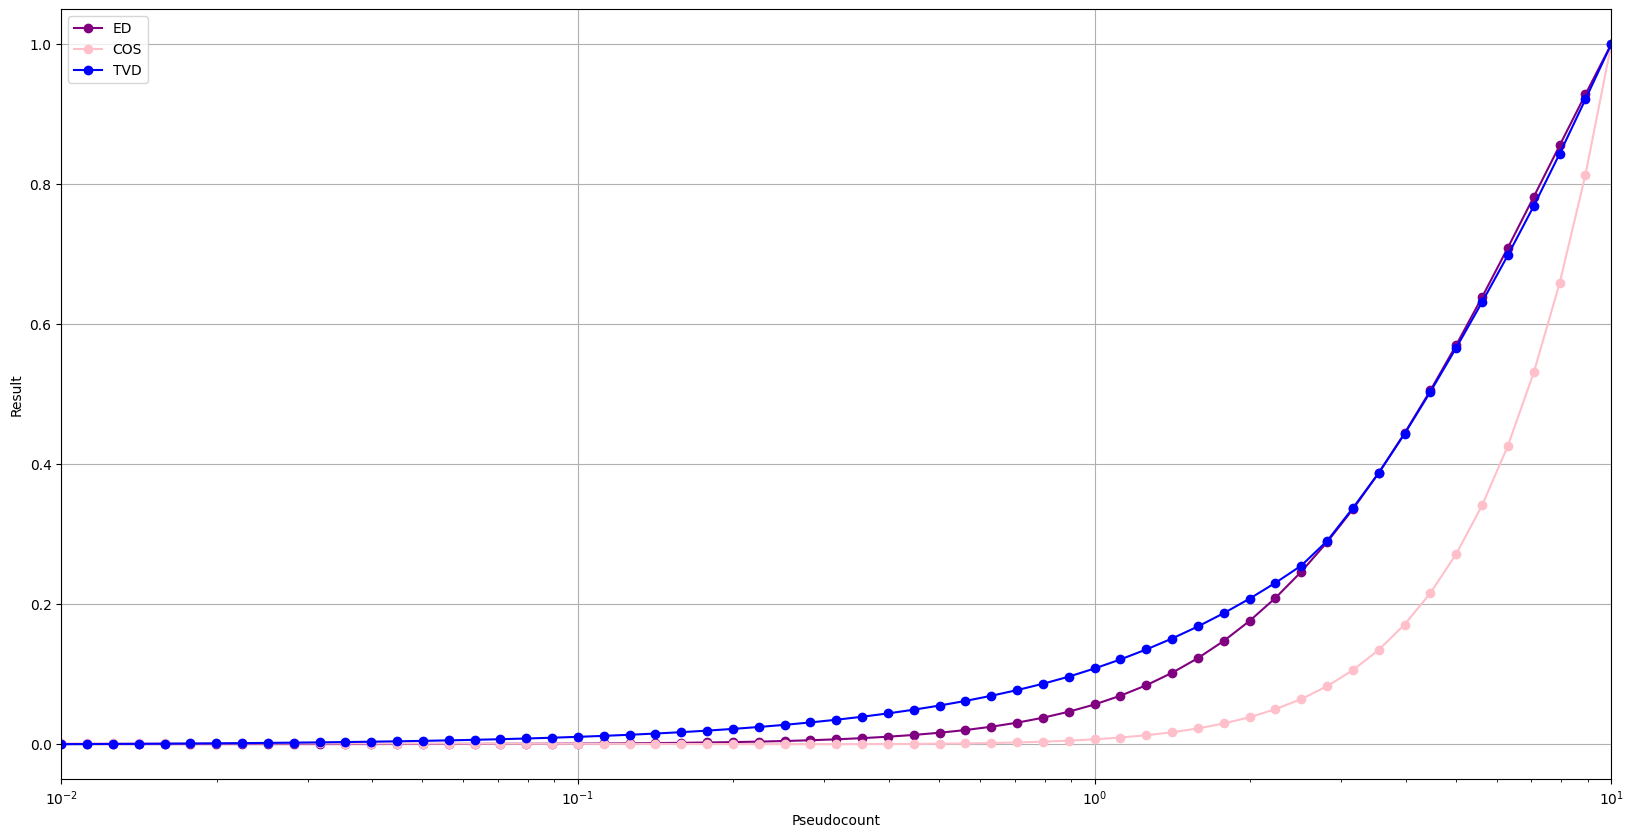

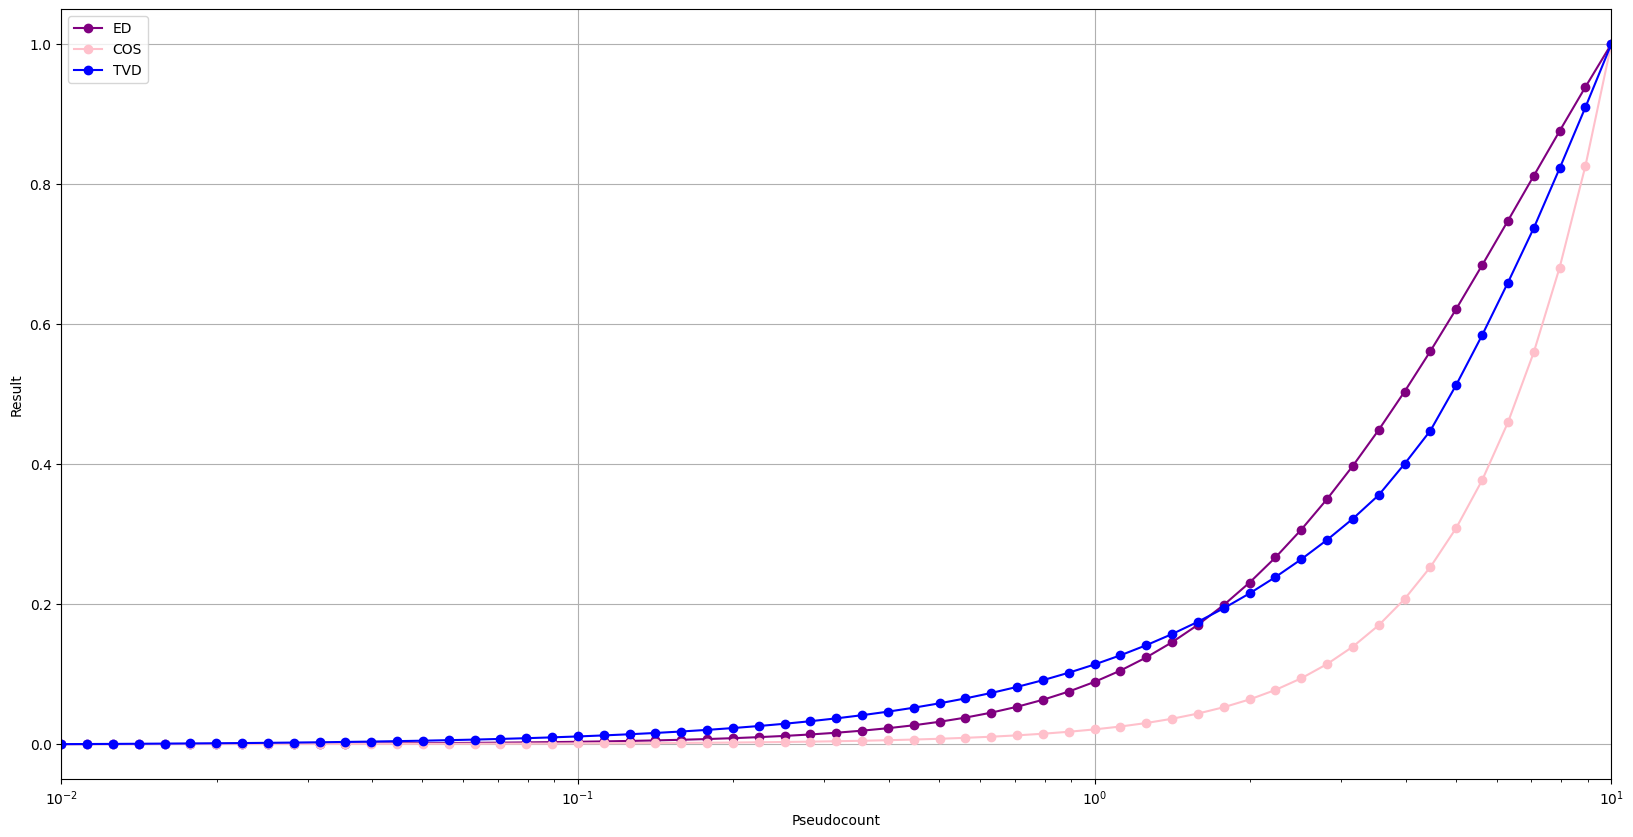

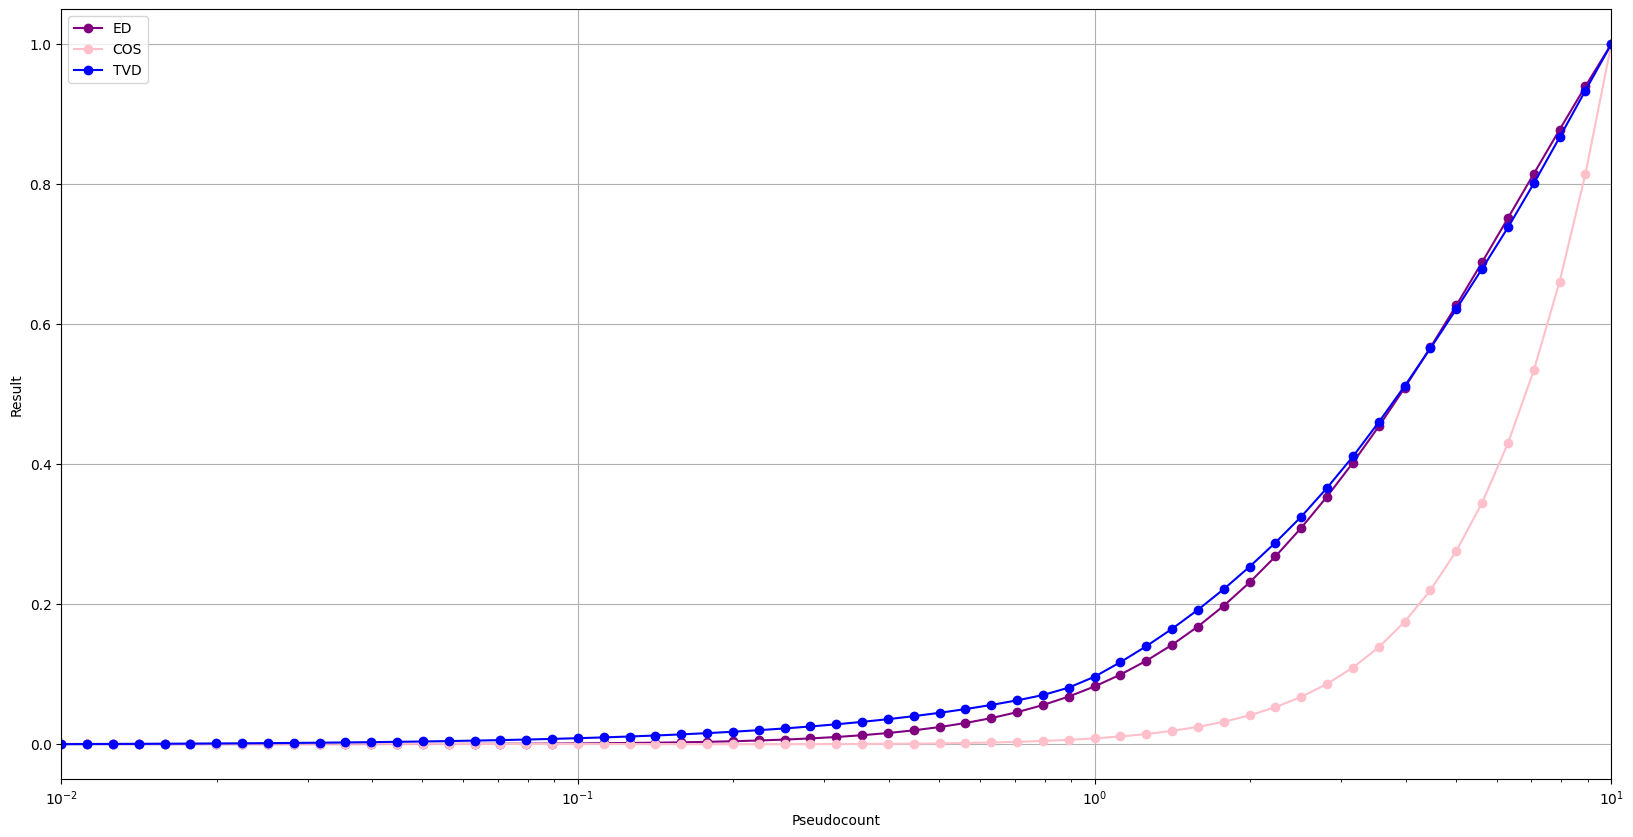

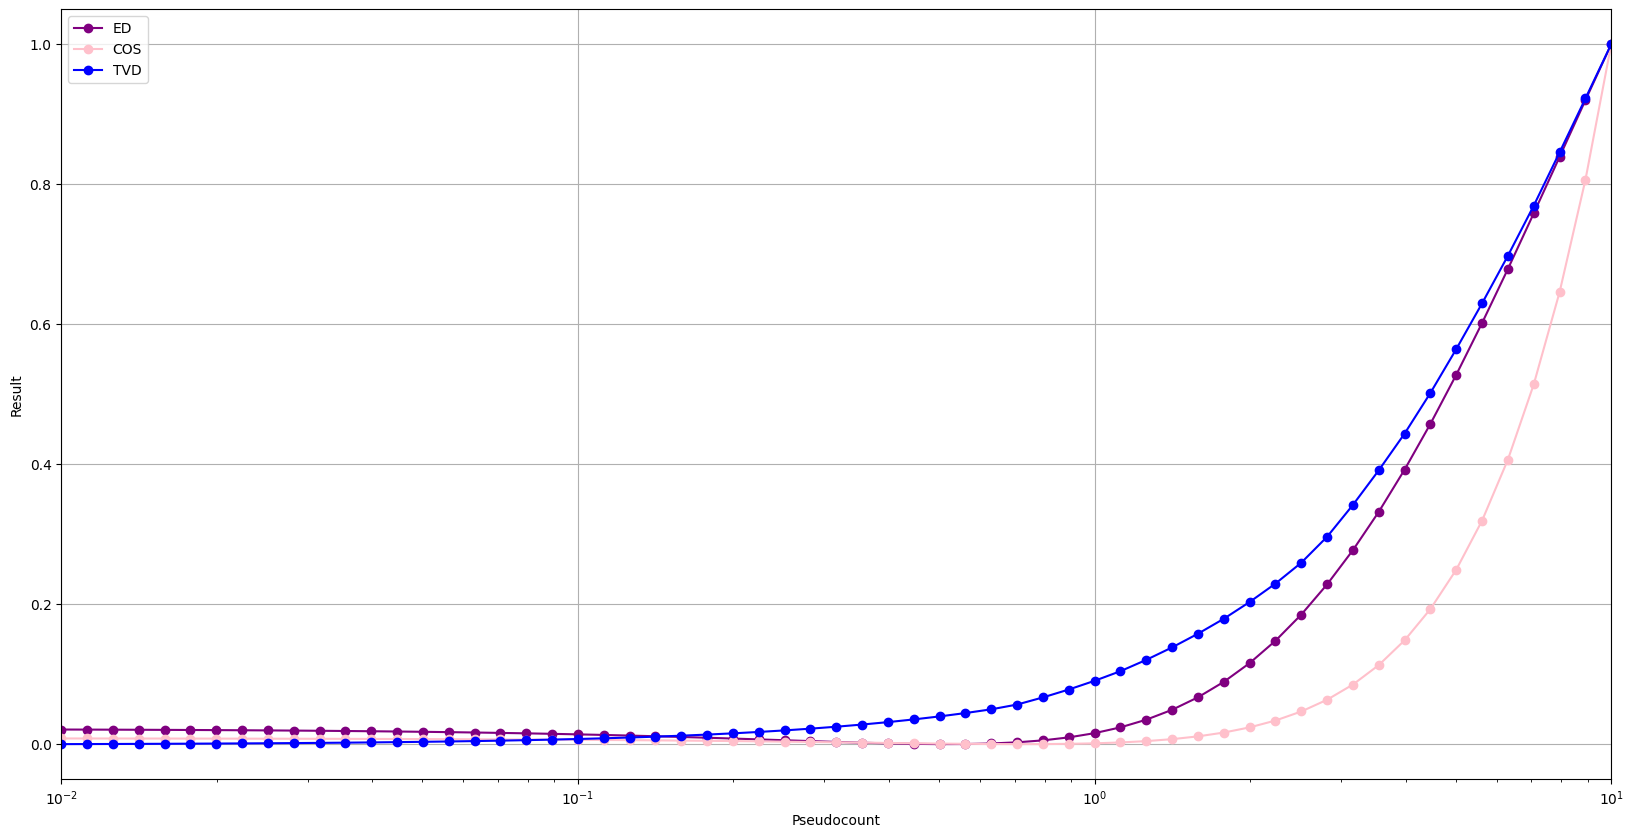

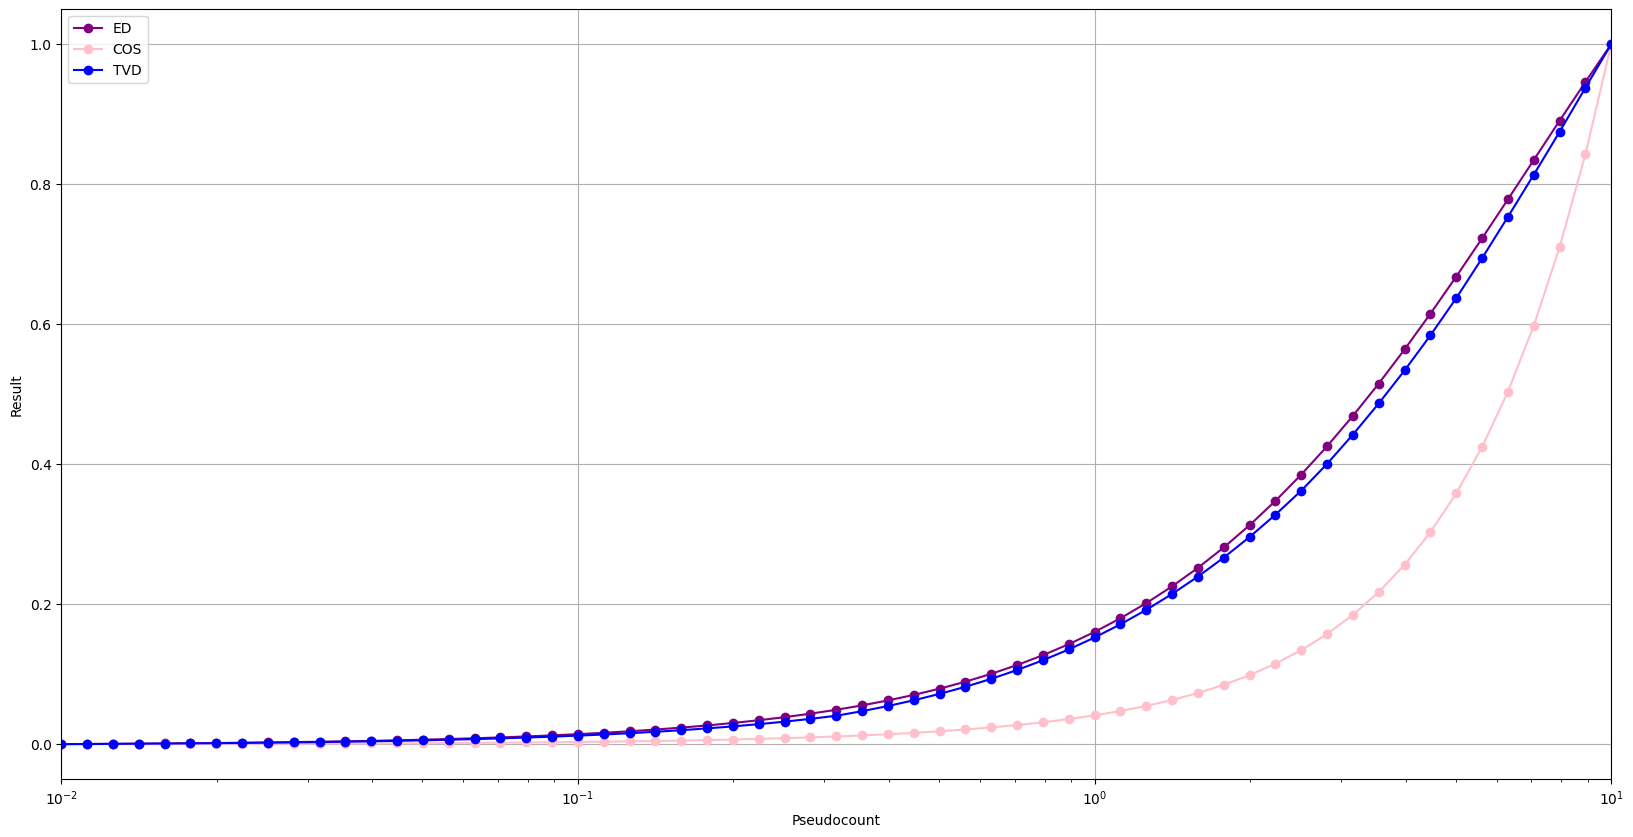

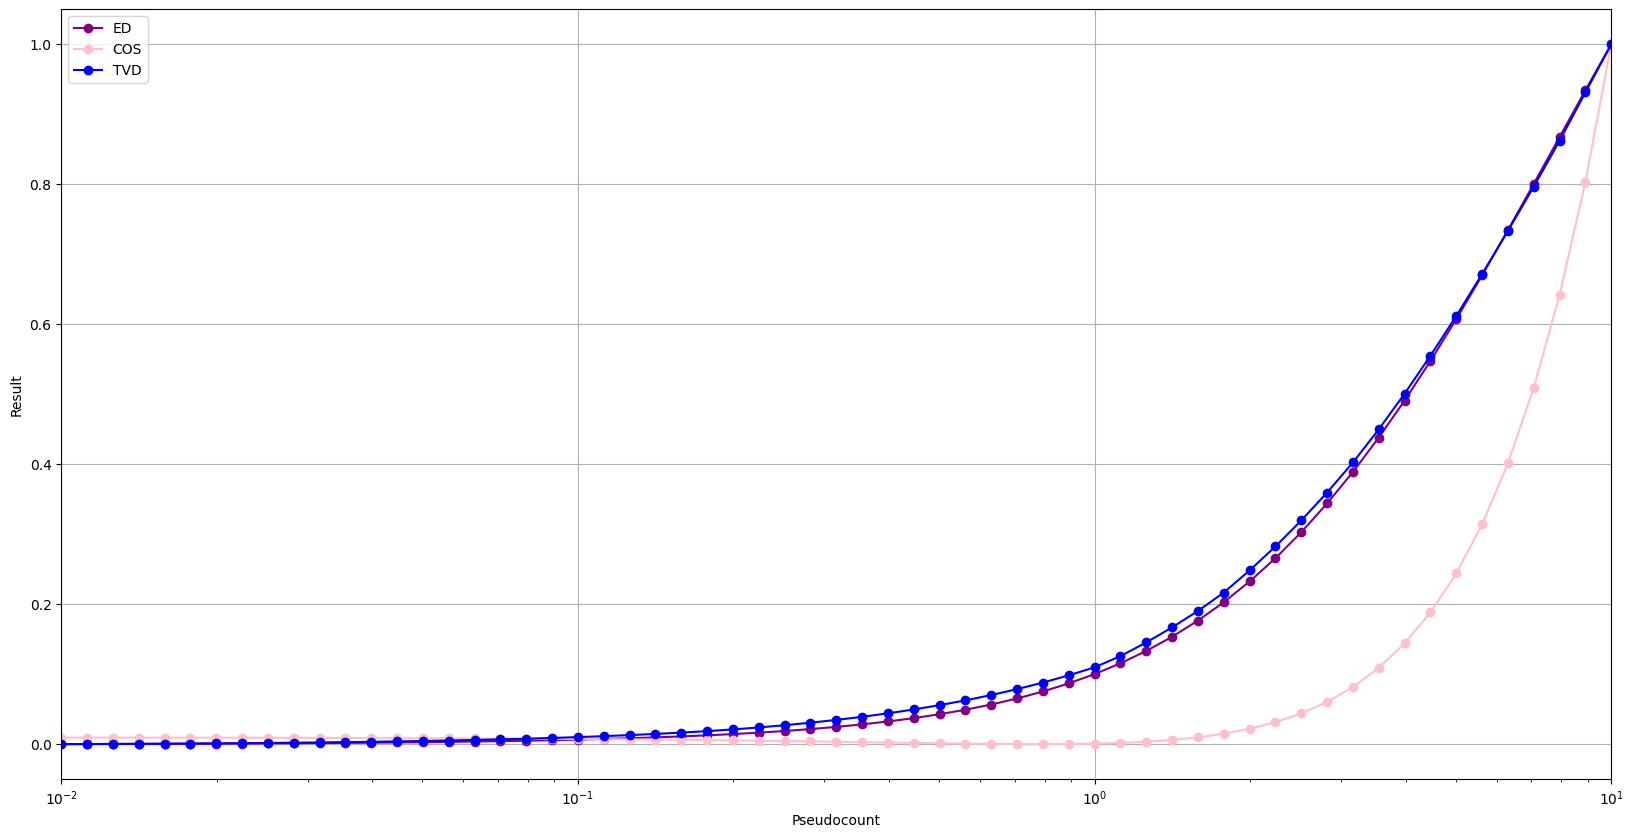

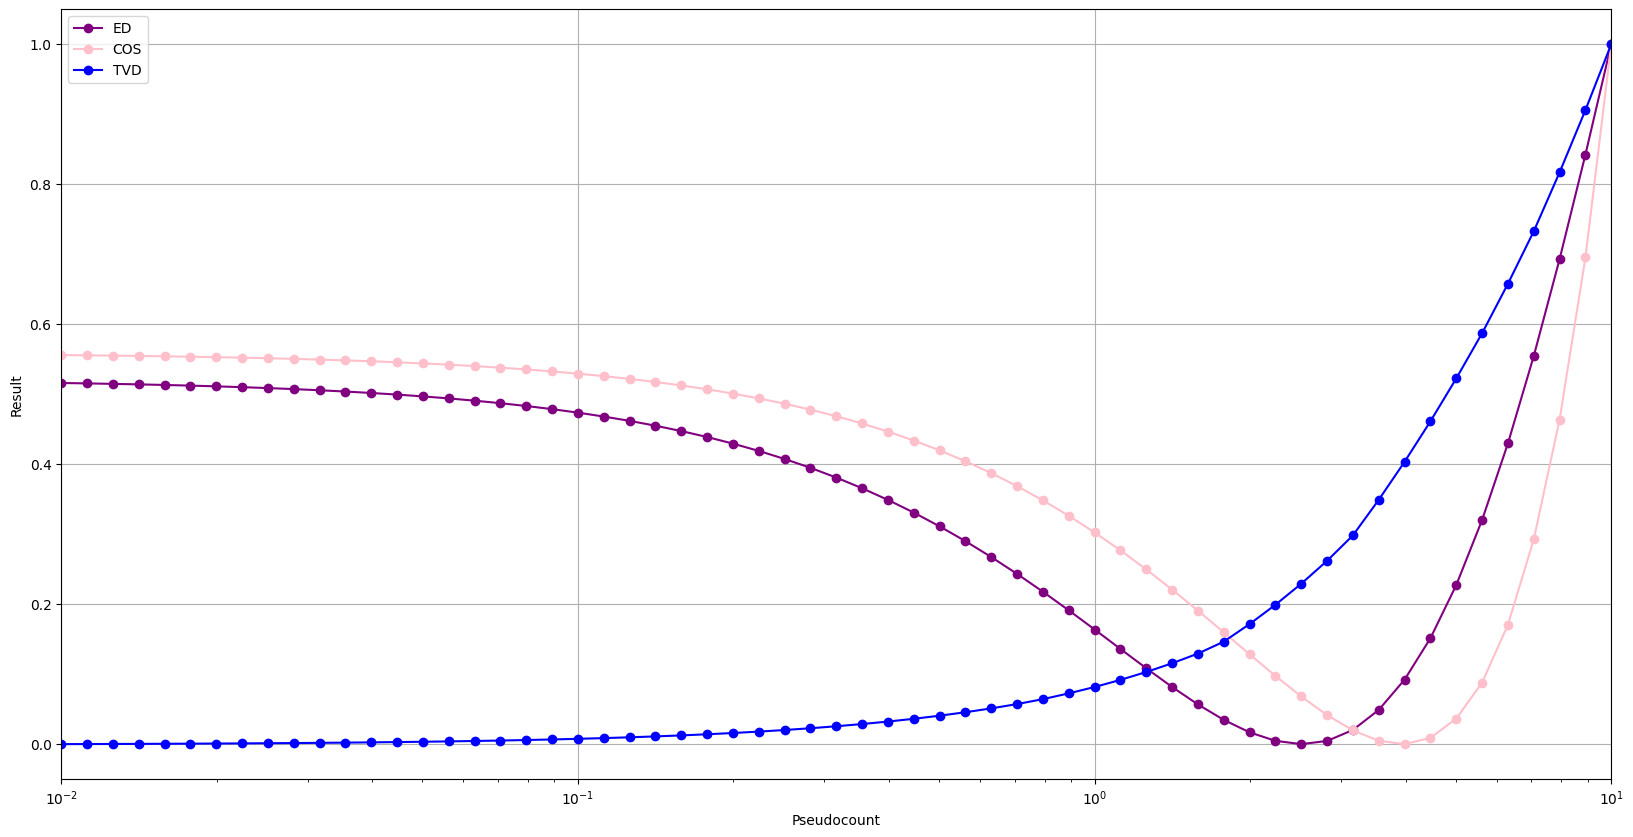

In [18]:
# adding different Pseudo counts and calculating distance using Euclidean distance

pseudocount = 0.01
w = 10
x = []
y = []
y2 = []
y3 = []
z = 0
counter = 1
i = 0
sum = 0
sum2 = 0
sum3 = 0
sum_PPM = 0
sum_artificial = 0

for sample_pfm in sample_PFMs:

  x = []
  y = []
  y2 = []
  y3 = []

  while z <= 60:

    pseudocount = np.power(10, ((z / 20) - 2))

    artificial_PPM = sample_pfm + (pseudocount / 4)
    artificial_PPM = artificial_PPM/(30 + pseudocount)

    for s in list_w_mers:

      indices = [nucleotides.index(nucleotide) for nucleotide in s]
      score_PPM = np.prod(PPMs[i][indices, range(len(s))])
      score_artificial_PPM = np.prod(artificial_PPM[indices, range(len(s))])

      # ED
      result = np.power((score_PPM - score_artificial_PPM), 2)
      sum += result

      #Cos
      sum_PPM += np.power(score_PPM, 2)
      sum_artificial += np.power(score_artificial_PPM, 2)
      sum2 += (score_PPM * score_artificial_PPM)

      #TVD
      sum3 += np.abs(score_PPM - score_artificial_PPM)

    cos = 1 - (sum2 / (np.sqrt(sum_PPM) * np.sqrt(sum_artificial)))
    ED = np.sqrt(sum)
    tvd = sum3 / 2

    x.append(pseudocount)
    y.append(ED)
    y2.append(cos)
    y3.append(tvd)
    z += 1
    counter += 1
    sum = 0
    sum2 = 0
    sum3 = 0
    sum_PPM = 0
    sum_artificial = 0

  normalized = np.interp(y, (np.min(y), np.max(y)), (0, 1))
  normalized2 = np.interp(y2, (np.min(y2), np.max(y2)), (0, 1))
  normalized3 = np.interp(y3, (np.min(y3), np.max(y3)), (0, 1))
  plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple', 'pink', 'blue', 'yellow'])
  plt.figure(figsize=(20, 10))
  plt.semilogx(x, normalized, label='ED',marker='o', linestyle='-')
  plt.semilogx(x, normalized2, label='COS',marker='o', linestyle='-')
  plt.semilogx(x, normalized3, label='TVD',marker='o', linestyle='-')
  plt.xlabel('Pseudocount')
  plt.ylabel('Result')
  plt.xlim(0.01, 10)
  plt.legend()
  plt.grid(True)
  plt.show()
  i += 1
  z = 0


In [19]:
PPM_entropies = []

for ppm in PPMs:

  entropies = entropy(ppm)
  sum = np.sum(entropies)
  PPM_entropies.append(sum)

In [23]:
for e in PPM_entropies:
  print(e)
  print("-----------------")

2.527253069143163
-----------------
2.19678185828914
-----------------
1.0042424730540764
-----------------
2.9133245090337017
-----------------
2.870589224134092
-----------------
2.2311138014693483
-----------------
3.6978542095910663
-----------------
2.311907770759644
-----------------
3.105904096811081
-----------------
3.8314042862422424
-----------------
